# Make Datasets

In [9]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
svc_clf = SVC(kernel='rbf', C=1, gamma=1)

CPU times: user 57 µs, sys: 5 µs, total: 62 µs
Wall time: 64.8 µs


In [3]:
x, y = make_circles(factor=0.5, noise=0.2)
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42, test_size=0.2)

In [6]:
try:
    import mglearn
except:
    !pip install mglearn
    import mglearn

     |████████████████████████████████| 540 kB 11.6 MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=3427f7f2a379ff4bac3071d45a725fe91c2998b350df9ea6263b86187389bd40
  Stored in directory: /Users/yoo/Library/Caches/pip/wheels/87/75/37/404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


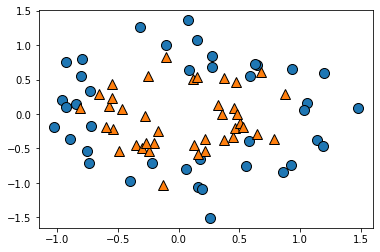

In [7]:
mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)

In [10]:
svc_clf.fit(x_train, y_train)

SVC(C=1, gamma=1)

CPU times: user 1.5 s, sys: 50.6 ms, total: 1.55 s
Wall time: 1.58 s


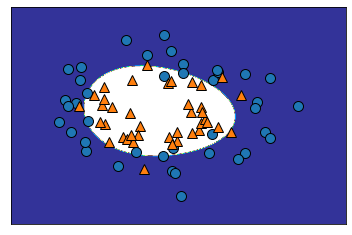

In [18]:
%%time
mglearn.plots.plot_2d_classification(svc_clf, x_train, eps=0.5, cm='terrain')
mglearn.discrete_scatter(x_train[:,0], x_train[:,1],y_train)

# Test parameters

In [19]:
C_list = [0.01, 0.1, 1, 10]
gamma_list = [0.01, 0.1, 1, 10]

CPU times: user 26 s, sys: 303 ms, total: 26.3 s
Wall time: 26.6 s


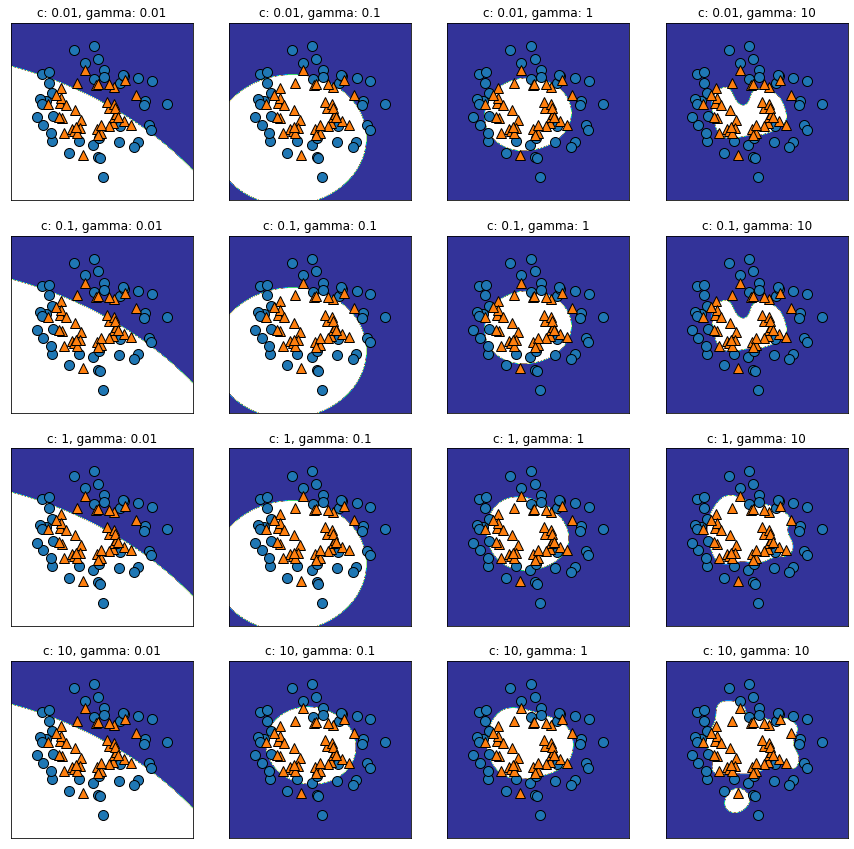

In [21]:
%%time
model_list = {}

count = 1
plt.figure(figsize=(15,15))

for idx, c in enumerate(C_list):
    for idx2, gamma in enumerate(gamma_list):
        idx = idx+1
        idx2 = idx2 + 1
        
        plt.subplot(4,4, count)
        count += 1
        
        svc_clf = SVC(kernel='rbf', C=c, gamma=gamma)
        model_key = (c, gamma)
        svc_clf.fit(x_train, y_train)
        
        model_list[model_key] = svc_clf
        plt.gca().set_title('c: {}, gamma: {}'.format(c, gamma))
        mglearn.plots.plot_2d_classification(svc_clf, x_train, y_train, eps=0.5, cm='terrain')
        mglearn.discrete_scatter(x_train[:,0], x_train[:,1], y_train)

In [25]:
model_list

{(0.01, 0.01): SVC(C=0.01, gamma=0.01),
 (0.01, 0.1): SVC(C=0.01, gamma=0.1),
 (0.01, 1): SVC(C=0.01, gamma=1),
 (0.01, 10): SVC(C=0.01, gamma=10),
 (0.1, 0.01): SVC(C=0.1, gamma=0.01),
 (0.1, 0.1): SVC(C=0.1, gamma=0.1),
 (0.1, 1): SVC(C=0.1, gamma=1),
 (0.1, 10): SVC(C=0.1, gamma=10),
 (1, 0.01): SVC(C=1, gamma=0.01),
 (1, 0.1): SVC(C=1, gamma=0.1),
 (1, 1): SVC(C=1, gamma=1),
 (1, 10): SVC(C=1, gamma=10),
 (10, 0.01): SVC(C=10, gamma=0.01),
 (10, 0.1): SVC(C=10, gamma=0.1),
 (10, 1): SVC(C=10, gamma=1),
 (10, 10): SVC(C=10, gamma=10)}

In [22]:
%%time
model_list[(10,10)].score(x_train, y_train)
model_list[(10,10)].score(x_test, y_test)

CPU times: user 1.78 ms, sys: 644 µs, total: 2.42 ms
Wall time: 1.92 ms


0.8

In [24]:
for i in model_list:
    train_score = model_list[i].score(x_train, y_train)
    test_score = model_list[i].score(x_test, y_test)
    print(i)
    print("Train Score:{}".format(train_score))
    print("Test Score:{}".format(test_score))
    print("-"*10)

(0.01, 0.01)
Train Score:0.6
Test Score:0.4
----------
(0.01, 0.1)
Train Score:0.6875
Test Score:0.55
----------
(0.01, 1)
Train Score:0.85
Test Score:0.75
----------
(0.01, 10)
Train Score:0.825
Test Score:0.7
----------
(0.1, 0.01)
Train Score:0.6
Test Score:0.4
----------
(0.1, 0.1)
Train Score:0.6875
Test Score:0.55
----------
(0.1, 1)
Train Score:0.85
Test Score:0.75
----------
(0.1, 10)
Train Score:0.825
Test Score:0.7
----------
(1, 0.01)
Train Score:0.6
Test Score:0.4
----------
(1, 0.1)
Train Score:0.6875
Test Score:0.55
----------
(1, 1)
Train Score:0.8375
Test Score:0.8
----------
(1, 10)
Train Score:0.9
Test Score:0.8
----------
(10, 0.01)
Train Score:0.6
Test Score:0.4
----------
(10, 0.1)
Train Score:0.85
Test Score:0.85
----------
(10, 1)
Train Score:0.8375
Test Score:0.8
----------
(10, 10)
Train Score:0.975
Test Score:0.8
----------


# Wine Datasets

In [27]:
from sklearn.datasets import load_wine
wine_data = load_wine()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
pd.options.display.float_format = '{:5}'.format

In [33]:
wine_data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [36]:
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.2,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.5,16.8,113.0,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.8,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0
174,13.4,3.91,2.48,23.0,102.0,1.8,0.75,0.43,1.41,7.3,0.7,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.6,1.62,840.0


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
x_train_scaled = scaler.fit_transform(x_train)

In [43]:
svm_clf = SVC(kernel='rbf')
svm_clf.fit(x_train_scaled, y_train)

SVC()

In [44]:
train_score = svm_clf.score(x_train_scaled, y_train)
x_test_scaled = scaler.fit_transform(x_test)
test_score = svm_clf.score(x_test_scaled, y_test)

In [45]:
print("Train score:{0} \n Test_score:{1}".format(train_score,test_score))

Train score:0.8625 
 Test_score:0.85
